<a href="https://colab.research.google.com/github/blbt123/TIS/blob/main/homework2023_02_21_%EC%9E%84%EC%9E%AC%EA%B4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# "국토교통부 부동산 실거래 데이터"를 활용하여
# 여러분이 거주하는 동의 관심 아파트 등에 대해 
# 거래금액의 추세(선그래프 활용)를 적절히 시각화하시오.

# 기타 의미있는 분석 추가 가능!!!(가점 요인, 대환영!!!)

In [1]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm

# 한글폰트 다운로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
# 마이너스 깨짐 현상 방지
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 128126 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
NanumBarunGothic


In [6]:
!pip install PublicDataReader --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.5 MB/s eta 0:00:00


In [5]:
service_key = "wRa4i2eGAPPBNEyi3sGcn9Uzxd4kTLdu%2FqkNdQSCOgWcGLMUChcvO2hQZjZT%2FkBO%2FXg%2Bvt%2Bf9vq0QKKQNHp91Q%3D%3D"

In [7]:
from PublicDataReader import TransactionPrice
api = TransactionPrice(service_key)

In [8]:
import PublicDataReader as pdr
sido_name = "인천"
sigungu_name = "서구"
eupmeondong_name = "청라동"
code = pdr.code_bdong()
code.loc[(code['시도명'].str.contains(sido_name, na=False)) &
         (code['시군구명'].str.contains(sigungu_name, na=False)) &
         (code['읍면동명'].str.contains(eupmeondong_name, na=False))
         ]

,시도코드,시도명,시군구코드,시군구명,법정동코드,읍면동명,동리명,생성일자,말소일자
3500,28,인천광역시,28260,서구,2826012200,청라동,NaN,20180701,NaN


In [56]:
df = api.get_data(
    property_type="아파트",
    trade_type="매매",
    sigungu_code="28260",
    start_year_month="201801",
    end_year_month="202212"
    )
df

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부
0,28260,검암로,검암동,501-1,풍림아이원2차,2004,8,84.9300,2018,1,...,0501,0001,28260,10300,1,28260-176,None,None,None,None
1,28260,검암로20번길,검암동,511,풍림아이원1,2003,6,84.6894,2018,1,...,0511,0000,28260,10300,1,28260-159,None,None,None,None
2,28260,검암로10번길,검암동,535-1,신명스카이뷰2,2003,1,84.9660,2018,1,...,0535,0001,28260,10300,1,28260-161,None,None,None,None
3,28260,승학로471번길,검암동,605-1,신명스카이뷰3차,2004,6,84.9660,2018,1,...,0605,0001,28260,10300,1,28260-178,None,None,None,None
4,28260,승학로495번길,검암동,595-3,서해그랑블,2003,9,69.6616,2018,1,...,0595,0003,28260,10300,1,28260-162,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32187,28260,청라에메랄드로,청라동,130-4,호반베르디움앤영무예다음,2011,13,59.8600,2022,12,...,0130,0004,28260,12200,1,28260-3849,중개거래,인천 서구,None,None
32188,28260,청라한울로,청라동,149-2,청라제일풍경채2차에듀앤파크,2017,7,84.8460,2022,12,...,0149,0002,28260,12200,1,28260-4558,중개거래,인천 서구,None,None
32189,28260,비즈니스로,청라동,82-1,청라모아미래도,2018,14,71.3679,2022,12,...,0082,0001,28260,12200,1,28260-4578,중개거래,인천 서구,None,None
32190,28260,청라에메랄드로,청라동,130-4,호반베르디움앤영무예다음,2011,17,59.9360,2022,12,...,0130,0004,28260,12200,1,28260-3849,직거래,None,None,None


In [58]:
# 거주지역 아파트 자료
rdf = df.loc[df["법정동"] =="검암동"]
rdf

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부
0,28260,검암로,검암동,501-1,풍림아이원2차,2004,8,84.9300,2018,1,...,0501,0001,28260,10300,1,28260-176,None,None,None,None
1,28260,검암로20번길,검암동,511,풍림아이원1,2003,6,84.6894,2018,1,...,0511,0000,28260,10300,1,28260-159,None,None,None,None
2,28260,검암로10번길,검암동,535-1,신명스카이뷰2,2003,1,84.9660,2018,1,...,0535,0001,28260,10300,1,28260-161,None,None,None,None
3,28260,승학로471번길,검암동,605-1,신명스카이뷰3차,2004,6,84.9660,2018,1,...,0605,0001,28260,10300,1,28260-178,None,None,None,None
4,28260,승학로495번길,검암동,595-3,서해그랑블,2003,9,69.6616,2018,1,...,0595,0003,28260,10300,1,28260-162,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31761,28260,승학로495번길,검암동,595-3,서해그랑블,2003,19,84.9634,2022,11,...,0595,0003,28260,10300,1,28260-162,중개거래,인천 서구,None,None
31762,28260,검암로10번길,검암동,512-2,풍림아이원3차,2004,11,84.9368,2022,11,...,0512,0002,28260,10300,1,28260-177,직거래,None,None,None
31981,28260,검암로10번길,검암동,535-2,검암4차신명스카이뷰,2004,9,84.5888,2022,12,...,0535,0002,28260,10300,1,28260-174,중개거래,인천 서구,None,None
31982,28260,검암로,검암동,501-1,풍림아이원2차,2004,16,84.9300,2022,12,...,0501,0001,28260,10300,1,28260-176,중개거래,인천 서구,None,None


In [59]:
# 검암동 아파트 건축년도, 층, 자료날짜, 전용면적, 거래금액 확인
rdf_value = rdf.loc[df["법정동"] =='검암동',['법정동', '아파트', '건축년도', '층', '전용면적', '년', '월', '일','거래금액']]
rdf_value

,법정동,아파트,건축년도,층,전용면적,년,월,일,거래금액
0,검암동,풍림아이원2차,2004,8,84.9300,2018,1,6,32500
1,검암동,풍림아이원1,2003,6,84.6894,2018,1,9,27500
2,검암동,신명스카이뷰2,2003,1,84.9660,2018,1,10,25400
3,검암동,신명스카이뷰3차,2004,6,84.9660,2018,1,13,29800
4,검암동,서해그랑블,2003,9,69.6616,2018,1,15,32000
...,...,...,...,...,...,...,...,...,...
31761,검암동,서해그랑블,2003,19,84.9634,2022,11,26,50300
31762,검암동,풍림아이원3차,2004,11,84.9368,2022,11,29,30000
31981,검암동,검암4차신명스카이뷰,2004,9,84.5888,2022,12,6,32300
31982,검암동,풍림아이원2차,2004,16,84.9300,2022,12,19,44000


In [60]:
# 아파트별 거래금액 평균
rdf_apv = rdf_value.groupby(["아파트","년"],as_index=False)["거래금액"].mean()
rdf_apv

,아파트,년,거래금액
0,검암4차신명스카이뷰,2018,26535.714286
1,검암4차신명스카이뷰,2019,26684.615385
2,검암4차신명스카이뷰,2020,29757.407407
3,검암4차신명스카이뷰,2021,39533.333333
4,검암4차신명스카이뷰,2022,38050.0
5,마젤란21,2018,32716.363636
6,마젤란21,2019,38150.0
7,마젤란21,2020,39475.0
8,마젤란21,2021,49984.615385
9,마젤란21,2022,54000.0


In [61]:
# 아파트별 거래금액 평균
rdf_apw = rdf_value.groupby(["아파트","년"],as_index=False)["전용면적"].mean()
rdf_apw

,아파트,년,전용면적
0,검암4차신명스카이뷰,2018,84.588800
1,검암4차신명스카이뷰,2019,84.588800
2,검암4차신명스카이뷰,2020,84.588800
3,검암4차신명스카이뷰,2021,84.588800
4,검암4차신명스카이뷰,2022,84.588800
5,마젤란21,2018,87.751464
6,마젤란21,2019,101.987500
7,마젤란21,2020,86.521189
8,마젤란21,2021,87.264762
9,마젤란21,2022,84.587900


In [62]:
import pandas as pd
import numpy as np

In [63]:
# 위 두개의 데이터 합하기
merged_df = pd.merge(rdf_apv, rdf_apw,on=["아파트","년"])
display(merged_df)

,아파트,년,거래금액,전용면적
0,검암4차신명스카이뷰,2018,26535.714286,84.588800
1,검암4차신명스카이뷰,2019,26684.615385,84.588800
2,검암4차신명스카이뷰,2020,29757.407407,84.588800
3,검암4차신명스카이뷰,2021,39533.333333,84.588800
4,검암4차신명스카이뷰,2022,38050.0,84.588800
5,마젤란21,2018,32716.363636,87.751464
6,마젤란21,2019,38150.0,101.987500
7,마젤란21,2020,39475.0,86.521189
8,마젤란21,2021,49984.615385,87.264762
9,마젤란21,2022,54000.0,84.587900


In [64]:
# 전용면적당 거래금액 구하기(단위: 만, m^2)
merged_df["전용면적당 거래금액"] = rdf_apv["거래금액"] / rdf_apw["전용면적"]
merged_df

,아파트,년,거래금액,전용면적,전용면적당 거래금액
0,검암4차신명스카이뷰,2018,26535.714286,84.588800,313.702456
1,검암4차신명스카이뷰,2019,26684.615385,84.588800,315.462749
2,검암4차신명스카이뷰,2020,29757.407407,84.588800,351.788977
3,검암4차신명스카이뷰,2021,39533.333333,84.588800,467.358957
4,검암4차신명스카이뷰,2022,38050.0,84.588800,449.823144
5,마젤란21,2018,32716.363636,87.751464,372.829834
6,마젤란21,2019,38150.0,101.987500,374.065449
7,마젤란21,2020,39475.0,86.521189,456.24662
8,마젤란21,2021,49984.615385,87.264762,572.792666
9,마젤란21,2022,54000.0,84.587900,638.389179


In [65]:
a = merged_df[merged_df['아파트'] == '검암4차신명스카이뷰']
a

,아파트,년,거래금액,전용면적,전용면적당 거래금액
0,검암4차신명스카이뷰,2018,26535.714286,84.5888,313.702456
1,검암4차신명스카이뷰,2019,26684.615385,84.5888,315.462749
2,검암4차신명스카이뷰,2020,29757.407407,84.5888,351.788977
3,검암4차신명스카이뷰,2021,39533.333333,84.5888,467.358957
4,검암4차신명스카이뷰,2022,38050.0,84.5888,449.823144


In [66]:
merged_df["아파트"].value_counts()

검암4차신명스카이뷰    5
마젤란21         5
삼보해피하임3       5
삼보해피하임4       5
서해그랑블         5
신명스카이뷰1       5
신명스카이뷰2       5
신명스카이뷰3차      5
풍림아이원1        5
풍림아이원2차       5
풍림아이원3차       5
Name: 아파트, dtype: int64

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

In [19]:
import matplotlib
import platform

print(platform.system()) # 플랫폼 확인

# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

Linux


<function matplotlib.pyplot.show(*args, **kw)>

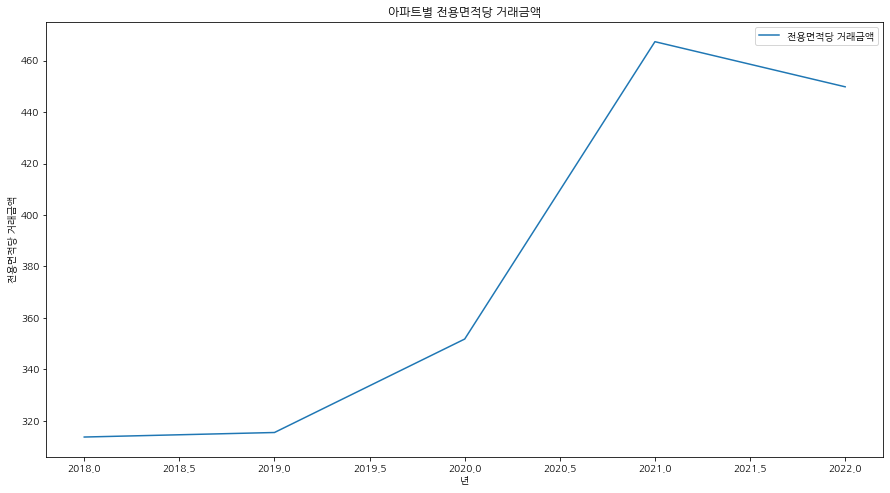

In [67]:
a.plot(kind = "line", x="년",y=["전용면적당 거래금액"], figsize=(15,8))
plt.title("아파트별 전용면적당 거래금액")
plt.xlabel("년")
plt.ylabel("전용면적당 거래금액")
plt.show

In [71]:
import numpy as np

In [73]:
import matplotlib.pyplot as plt

import numpy as np

x_data = [2018,2019,2020,2021,2022]
y_data1 = merged_df[merged_df['아파트'] == '검암4차신명스카이뷰']["전용면적당 거래금액"].to_numpy()
y_data2 = merged_df[merged_df['아파트'] == '삼보해피하임3']["전용면적당 거래금액"].to_numpy()
y_data3 = merged_df[merged_df['아파트'] == '서해그랑블']["전용면적당 거래금액"].to_numpy()
y_data4 = merged_df[merged_df['아파트'] == '신명스카이뷰1']["전용면적당 거래금액"].to_numpy()
y_data5 = merged_df[merged_df['아파트'] == '풍림아이원2차']["전용면적당 거래금액"].to_numpy()
y_data6 = merged_df[merged_df['아파트'] == '풍림아이원3차']["전용면적당 거래금액"].to_numpy()
y_data7 = merged_df[merged_df['아파트'] == '마젤란21']["전용면적당 거래금액"].to_numpy()
y_data8 = merged_df[merged_df['아파트'] == '삼보해피하임4']["전용면적당 거래금액"].to_numpy()
y_data9 = merged_df[merged_df['아파트'] == '신명스카이뷰2']["전용면적당 거래금액"].to_numpy()
y_data10 = merged_df[merged_df['아파트'] == '신명스카이뷰3차']["전용면적당 거래금액"].to_numpy()
y_data11 = merged_df[merged_df['아파트'] == '풍림아이원1']["전용면적당 거래금액"].to_numpy()

y_data1

array([313.7024557117997, 315.4627490236932, 351.7889768788233,
       467.3589568989433, 449.82314443519704], dtype=object)

<function matplotlib.pyplot.show(*args, **kw)>

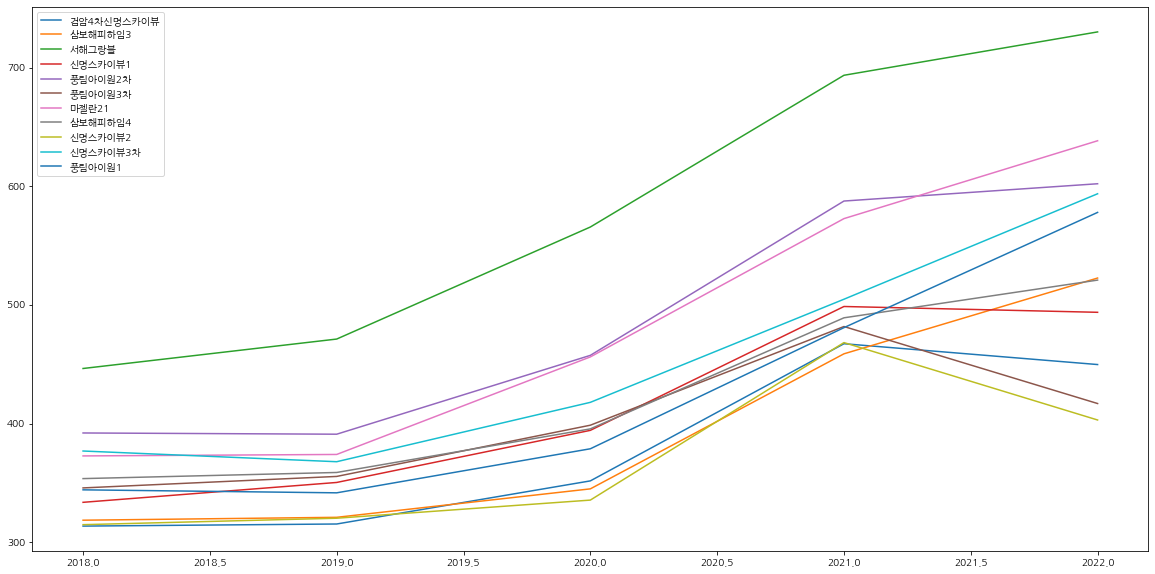

In [81]:
plt.figure(figsize=(20, 10))
plt.plot(x_data, y_data1, label='검암4차신명스카이뷰')
plt.plot(x_data, y_data2, label='삼보해피하임3')
plt.plot(x_data, y_data3, label='서해그랑블')
plt.plot(x_data, y_data4, label='신명스카이뷰1')
plt.plot(x_data, y_data5, label='풍림아이원2차')
plt.plot(x_data, y_data6, label='풍림아이원3차')
plt.plot(x_data, y_data7, label='마젤란21')
plt.plot(x_data, y_data8, label='삼보해피하임4')
plt.plot(x_data, y_data9, label='신명스카이뷰2')
plt.plot(x_data, y_data10, label='신명스카이뷰3차')
plt.plot(x_data, y_data11, label='풍림아이원1')
plt.legend()
plt.show

In [ ]:
plt.plot([2018,2019,2020,2021,2022], [4,1,2], label = "line1")
plt.plot([1,2,3], [5,6,0], label = "line2")
plt.legend(loc = "upper right")